<a href="https://colab.research.google.com/github/sadhanajarag/CV/blob/main/Task_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - 1

## Q1: Create a function to convert RGB to Grey scale image. Use numpy, pytorch, or tf but don't direct available functions.

Hint: Use the formula: Gray = 0.299*R + 0.587*G + 0.114*B for the conversion.


In [1]:
import numpy as np
import cv2
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
from matplotlib import pyplot as plt
import random
import torch
import io
import os

### Soulution : Using Pytorch

In [2]:
image_path = '/content/flo.jpg'

In [3]:
image = Image.open(image_path)

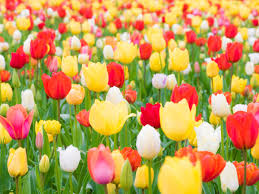

In [61]:
image

In [4]:
to_tensor = ToTensor()

In [5]:
image_tensor = to_tensor(image)

In [6]:
image_tensor

tensor([[[1.0000, 1.0000, 0.9647,  ..., 0.9686, 0.9765, 0.9882],
         [0.9882, 0.9961, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         [0.9529, 0.9804, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1725, 0.2118, 0.2314,  ..., 0.2627, 0.2745, 0.3647],
         [0.2745, 0.2431, 0.2745,  ..., 0.1686, 0.1922, 0.3882],
         [0.2745, 0.2431, 0.2745,  ..., 0.1804, 0.2000, 0.3961]],

        [[0.8118, 0.8314, 0.8078,  ..., 0.8431, 0.8549, 0.8784],
         [0.7490, 0.7922, 0.8000,  ..., 0.8431, 0.8471, 0.8588],
         [0.6706, 0.7373, 0.7765,  ..., 0.8275, 0.8235, 0.8157],
         ...,
         [0.4118, 0.4392, 0.4392,  ..., 0.4863, 0.4902, 0.5686],
         [0.4941, 0.4510, 0.4745,  ..., 0.4392, 0.4431, 0.6078],
         [0.4941, 0.4510, 0.4745,  ..., 0.4353, 0.4392, 0.6078]],

        [[0.3412, 0.3529, 0.3294,  ..., 0.2824, 0.2941, 0.3176],
         [0.3333, 0.3608, 0.3608,  ..., 0.3333, 0.3373, 0.3451],
         [0.3490, 0.3961, 0.4157,  ..., 0.2471, 0.2431, 0.

In [84]:
image_tensor.shape

torch.Size([3, 194, 259])

In [85]:
grayscale_image = 0.299 * image_tensor[0, :, :] + 0.587 * image_tensor[1, :, :] + 0.114 * image_tensor[2, :, :]

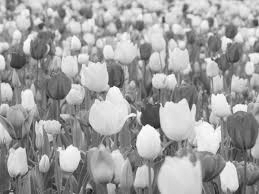

In [91]:
grayscale_image

# #Read image using Numpy

In [92]:
image_np = np.array(image)

In [93]:
image_np.shape

(194, 259, 3)

In [94]:
grayscale_image = 0.299 * image_np[:, :, 0] + 0.587 * image_np[:, :, 1] + 0.114 * image_np[:, :, 2]

In [95]:
grayscale_image

array([[207.672, 210.949, 204.052, ..., 208.266, 210.967, 216.07 ],
       [197.155, 205.008, 204.089, ..., 212.14 , 212.841, 214.83 ],
       [183.18 , 196.62 , 202.761, ..., 207.284, 206.583, 205.181],
       ...,
       [ 78.781,  85.994,  86.805, ..., 102.055, 100.803, 117.938],
       [102.302,  91.401,  96.973, ...,  82.249,  84.972, 129.706],
       [102.302,  91.401,  96.973, ...,  82.217,  84.641, 129.962]])

In [96]:
grayscale_image = Image.fromarray(np.uint8(grayscale_image))

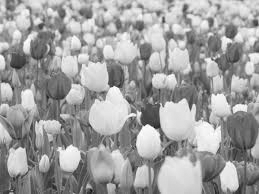

In [97]:
grayscale_image

## Q2 : Create a function to convolve_image taking image, kernel as input and returned convolved image.

Hint :  Easy Pesy - done in the class.  

### Solution :

In [99]:
import torch.nn.functional as F

In [105]:
import torch

# Example tensor with shape (1, 3, 5, 5)
tensor = torch.rand(1, 3, 5, 5)
print("Before squeeze:", tensor.shape)

# Remove the batch dimension
squeezed_tensor = tensor.squeeze(0)
print("After squeeze:", squeezed_tensor.shape)

Before squeeze: torch.Size([1, 3, 5, 5])
After squeeze: torch.Size([3, 5, 5])


In [106]:
def convolve_image(image,kernel):
  convolved_image = F.conv2d(image.unsqueeze(0), kernel, padding=1)
  return convolved_image.squeeze(0)

kernel = torch.rand(1, 3, 4, 4)
convolved_image = convolve_image(image_tensor,kernel)
#
print(convolved_image)

tensor([[[ 9.3097, 11.6767, 11.6319,  ..., 11.7834, 11.8333,  7.7210],
         [12.8654, 16.7471, 16.7412,  ..., 16.3970, 16.2519, 11.7034],
         [12.9642, 16.9645, 17.0564,  ..., 16.2483, 15.8239, 11.4048],
         ...,
         [ 4.9838,  6.0481,  5.8187,  ...,  9.3820,  9.2451,  5.8440],
         [ 5.2514,  6.1106,  5.7458,  ...,  8.5526,  8.7521,  5.4611],
         [ 4.0941,  4.5048,  4.1299,  ...,  5.9676,  6.2151,  4.0642]]])


## Q3 : Apply Below Kernels - Note the effects you observe

1. ```
[[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]]
```

2. ```
[[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```

3. ```
[[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]]
```

4. ```
 [[-1, -2, -1],
 [0,  0,  0],
 [1,  2,  1]]
 ```


5. ```
 [[ 0, -1,  0],
 [-1,  5, -1],
 [ 0, -1,  0]]
 ```

6. ```
 [[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```
7. ```
[[-2, -1,  0],
 [-1,  1,  1],
 [ 0,  1,  2]]
```

8. ```
[[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]]
```

## Solution

In [120]:
to_tensor = ToTensor()
image_tensor = to_tensor(image)
image_tensor.shape

torch.Size([3, 194, 259])

In [122]:
image_tensor

tensor([[[1.0000, 1.0000, 0.9647,  ..., 0.9686, 0.9765, 0.9882],
         [0.9882, 0.9961, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         [0.9529, 0.9804, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1725, 0.2118, 0.2314,  ..., 0.2627, 0.2745, 0.3647],
         [0.2745, 0.2431, 0.2745,  ..., 0.1686, 0.1922, 0.3882],
         [0.2745, 0.2431, 0.2745,  ..., 0.1804, 0.2000, 0.3961]],

        [[0.8118, 0.8314, 0.8078,  ..., 0.8431, 0.8549, 0.8784],
         [0.7490, 0.7922, 0.8000,  ..., 0.8431, 0.8471, 0.8588],
         [0.6706, 0.7373, 0.7765,  ..., 0.8275, 0.8235, 0.8157],
         ...,
         [0.4118, 0.4392, 0.4392,  ..., 0.4863, 0.4902, 0.5686],
         [0.4941, 0.4510, 0.4745,  ..., 0.4392, 0.4431, 0.6078],
         [0.4941, 0.4510, 0.4745,  ..., 0.4353, 0.4392, 0.6078]],

        [[0.3412, 0.3529, 0.3294,  ..., 0.2824, 0.2941, 0.3176],
         [0.3333, 0.3608, 0.3608,  ..., 0.3333, 0.3373, 0.3451],
         [0.3490, 0.3961, 0.4157,  ..., 0.2471, 0.2431, 0.

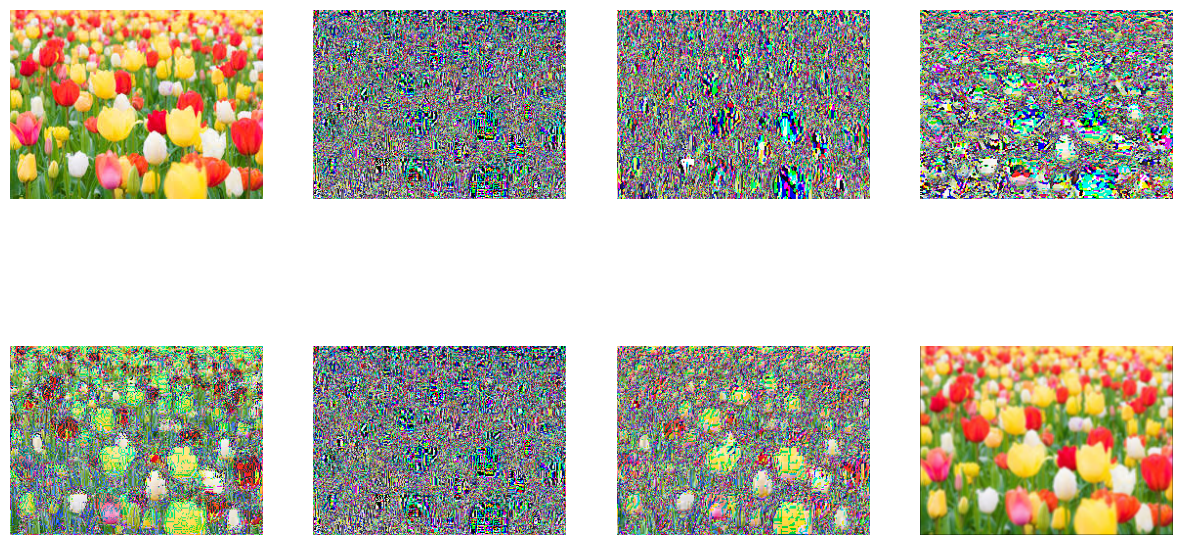

In [131]:
import torch
import torch.nn.functional as F

def apply_kernel(image, kernel):
  #Converts the kernel to a PyTorch tensor of type float32.
  #unsqueeze(0) adds a new dimension at position 0, changing the shape from [3, 3] to [1, 3, 3].
    kernel = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0)
    kernel = kernel.repeat(3, 1, 1, 1)  # Repeat the kernel for each input channel(RGB)repeat(3, 1, 1, 1) repeats the kernel along the first dimension (input channels) to match the number of channels in the input image.
    #If the original kernel shape is [1, 3, 3], after repeating, it becomes [3, 1, 3, 3].
    #unsqueeze(0) adds a new dimension at position 0, changing the shape from [3, 194, 259] to [1, 3, 194, 259].
    image = image.unsqueeze(0)  # Add batch dimension
    #groups=3 ensures that each input channel is convolved with its corresponding kernel. This means the convolution is performed separately for each channel.
    convolved_image = F.conv2d(image, kernel, padding=1, groups=3)
    #squeeze(0) removes the batch dimension, changing the shape from [1, 3, 194, 259] to [3, 194, 259].
    return convolved_image.squeeze(0)

# Define the kernels
kernels = [
    [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
    [[-1, -2, -1], [0, 0, 0], [1, 2, 1]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]],
    [[0.111, 0.111, 0.111], [0.111, 0.111, 0.111], [0.111, 0.111, 0.111]]
]

# Assuming 'image' is a PIL image or a NumPy array
to_tensor = ToTensor()
image_tensor = to_tensor(image)

# Apply each kernel and display the results
to_pil = ToPILImage()
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, kernel in enumerate(kernels):
    convolved_image = apply_kernel(image_tensor, kernel)
    axs[i // 4, i % 4].imshow(to_pil(convolved_image), cmap='gray')
    (f'Kernel {i+1}')
    axs[i // 4, i % 4].axis('off')
plt.show()

## Question 4: Image Filtering and Transformation
**Task**: Implement a function to perform image filtering and transformation that includes:

* **Filtering**: Apply a Gaussian blur to the image to reduce noise and smooth the image.
* **Transformation**: Apply a rotation to the image by a specified angle.


Hints:
* For Gaussian blur, you can create a Gaussian kernel and apply it using convolution. https://en.wikipedia.org/wiki/Gaussian_blur
* For rotation, compute the rotation matrix and use cv2.warpAffine. https://theailearner.com/tag/cv2-warpaffine/


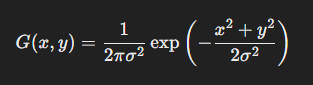


### Solution :

In [7]:
import torch
import torch.nn.functional as F
import cv2
import numpy as np
from torchvision.transforms import ToTensor, ToPILImage

def gaussian_kernel(size, sigma):
    """Creates a 2D Gaussian kernel."""
    x = torch.arange(-size // 2 + 1, size // 2 + 1)
    y = torch.arange(-size // 2 + 1, size // 2 + 1)
    x_grid, y_grid = torch.meshgrid(x, y, indexing='ij')
    kernel = torch.exp(-(x_grid**2 + y_grid**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel

def apply_gaussian_blur(image, kernel_size=5, sigma=1.0):
    """Applies Gaussian blur to the image."""
    kernel = gaussian_kernel(kernel_size, sigma).unsqueeze(0).unsqueeze(0)
    kernel = kernel.repeat(3, 1, 1, 1)  # Repeat the kernel for each input channel
    blurred_image = F.conv2d(image.unsqueeze(0), kernel, padding=kernel_size // 2, groups=3)
    return blurred_image.squeeze(0)

def rotate_image(image, angle):
    """Rotates the image by the specified angle."""
    image_np = image.permute(1, 2, 0).numpy()  # Convert to HWC format for OpenCV
    height, width = image_np.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image_np = cv2.warpAffine(image_np, rotation_matrix, (width, height))
    rotated_image = ToTensor()(rotated_image_np)
    return rotated_image

# Example usage
# Assuming 'image' is a PIL image or a NumPy array
to_tensor = ToTensor()
image_tensor = to_tensor(image)

# Apply Gaussian blur
blurred_image = apply_gaussian_blur(image_tensor, kernel_size=5, sigma=1.0)

# Rotate the image by 45 degrees
rotated_image = rotate_image(blurred_image, angle=45)

# Convert back to PIL image for visualization
to_pil = ToPILImage()
result_image = to_pil(rotated_image)
result_image.show()

## Question 5: Normalization

Apply different Image Normalization technique from scratch and visualize the effect.

* Do normalization - see effect on min, max, mean, std value
* See changes in Pixel Distribution

### Solution

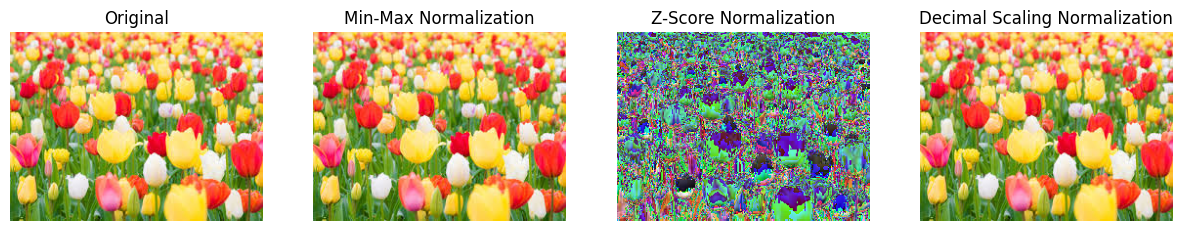

Original - Min: 0.0, Max: 1.0, Mean: 0.573879063129425, Std: 0.30566099286079407
Min-Max Normalized - Min: 0.0, Max: 1.0, Mean: 0.573879063129425, Std: 0.30566099286079407
Z-Score Normalized - Min: -1.8775018453598022, Max: 1.3940966129302979, Mean: -1.7689457010305887e-08, Std: 1.0000001192092896
Decimal Scaling Normalized - Min: 0.0, Max: 1.0, Mean: 0.573879063129425, Std: 0.30566099286079407


In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, ToPILImage

def min_max_normalization(image):
    """Applies Min-Max normalization to the image."""
    min_val = image.min()
    max_val = image.max()
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

def z_score_normalization(image):
    """Applies Z-Score normalization to the image."""
    mean = image.mean()
    std = image.std()
    normalized_image = (image - mean) / std
    return normalized_image

def decimal_scaling_normalization(image):
    """Applies Decimal Scaling normalization to the image."""
    max_val = image.abs().max()
    scaling_factor = 10 ** torch.ceil(torch.log10(max_val))
    normalized_image = image / scaling_factor
    return normalized_image

def visualize_normalization(image, normalized_images, titles):
    """Visualizes the original and normalized images."""
    to_pil = ToPILImage()
    fig, axs = plt.subplots(1, len(normalized_images) + 1, figsize=(15, 5))

    # Original image
    axs[0].imshow(to_pil(image), cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    # Normalized images
    for i, (norm_image, title) in enumerate(zip(normalized_images, titles)):
        axs[i + 1].imshow(to_pil(norm_image), cmap='gray')
        axs[i + 1].set_title(title)
        axs[i + 1].axis('off')

    plt.show()

def print_stats(image, title):
    """Prints the statistics of the image."""
    print(f"{title} - Min: {image.min().item()}, Max: {image.max().item()}, Mean: {image.mean().item()}, Std: {image.std().item()}")

# Assuming 'image' is a PIL image or a NumPy array
to_tensor = ToTensor()
image_tensor = to_tensor(image)

# Apply normalization techniques
min_max_image = min_max_normalization(image_tensor)
z_score_image = z_score_normalization(image_tensor)
decimal_scaling_image = decimal_scaling_normalization(image_tensor)

# Visualize the effects
normalized_images = [min_max_image, z_score_image, decimal_scaling_image]
titles = ['Min-Max Normalization', 'Z-Score Normalization', 'Decimal Scaling Normalization']
visualize_normalization(image_tensor, normalized_images, titles)

# Print statistics
print_stats(image_tensor, "Original")
print_stats(min_max_image, "Min-Max Normalized")
print_stats(z_score_image, "Z-Score Normalized")
print_stats(decimal_scaling_image, "Decimal Scaling Normalized")

# Happy Learning !
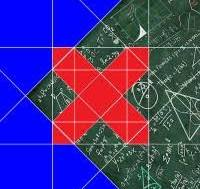
